In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer #Reemplazo de datos faltantes
import numpy as np

datos = pd.read_csv('D:/lvs/Master/ProyectoTFM/datos/Post-Procesing/df_tablaGN_metGBA.csv')

In [2]:
#Creamos conjuntos de datos
X = datos.iloc[:,1:-1].values
y = datos.iloc[:,-1].values

In [3]:
#Dividir concunto de entrenamiento y de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
#Ajustar el modelo de Regresion Lineal multiple
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
y_pred = regression.predict(X_test)

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
kf = KFold(n_splits=5)

scores = cross_val_score(regression, X_train, y_train, cv=kf, scoring='r2')
print("Validacion cruzada:")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

print('Metricas sobre la prediccion')
print('R^2:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print('RMSE:',sqrt(mean_squared_error(y_test, y_pred)))

Validacion cruzada:
Metricas cross_validation [0.58974993 0.57430627 0.63810214 0.36226214 0.48986413]
Media de cross_validation 0.5308569215904931
Metricas sobre la prediccion
R^2: 0.5188697014358492
MSE: 77.13902696010344
RMSE: 8.782882611085236


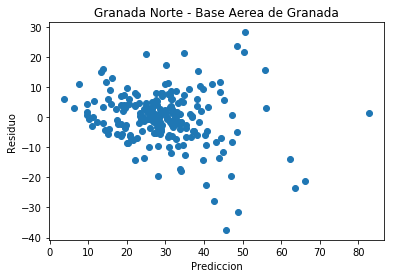

In [21]:
from matplotlib import pyplot as plt
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel('Prediccion')
plt.ylabel('Residuo')
plt.title('Granada Norte - Base Aerea de Granada')
plt.show()

In [8]:
#Iniciamos la contruccuion optimo del modelo con eliminacion hacia atras

In [9]:
#Construccion del modelo optimo con la eliminacion hacia atras
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
SL = 0.05

In [15]:
#quitamos la racha
X_opt = X[:,[0,1,2,3,4,6,8,11,12,14]]
regression_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     165.8
Date:                Sat, 06 Jun 2020   Prob (F-statistic):          1.19e-195
Time:                        16:50:39   Log-Likelihood:                -3861.5
No. Observations:                1075   AIC:                             7743.
Df Residuals:                    1065   BIC:                             7793.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -269.6934     59.637     -4.522      0.000    -386.712    -152.674
x1             1.2280      0.127      9.688      0.000       0.979       1.477
x2            -0.7006      0.110     -6.366      0.000      -0.917      -0.485
x3            -0.0347      0.009     -3.814      0.000      -0.052      -0.017
x4             0.2170      0.060      3.622      0.000       0.099       0.335
x5            -0.2410      0.075     -3.224      0.001      -0.388      -0.094
x6             0.2983      0.064      4.665      0.000       0.173       0.424
x7             0.9301      0.170      5.485      0.000       0.597       1.263
x8            -1.0053      0.194     -5.180      0.000      -1.386      -0.625
x9            -0.8499      0.300     -2.834      0.005      -1.438      -0.261
==============================================================================
Omnibus:                      228.017   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1234.176
Skew:                           0.863   Prob(JB):                    1.00e-268
Kurtosis:                       7.957   Cond. No.                     2.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
regression_opt = LinearRegression()
regression_opt.fit(X_train[:,[0,1,2,3,5,7,10,11,13]],y_train)
y_pred_opt = regression_opt.predict(X_test[:,[0,1,2,3,5,7,10,11,13]])

#resultado_opt = evaluate(regression_opt, X_test[:,[0,1,2,3,5,7,10,11,13]], y_test)
#score_opt = regression_opt.score(X_train[:,[0,1,2,3,5,7,10,11,13]],y_train)
#print("Metrica del modelo", score_opt)

In [19]:
print('Metricas sobre la prediccion Modificada')
print('R^2:',r2_score(y_test, y_pred_opt))
print('MSE:',mean_squared_error(y_test, y_pred_opt))
print('RMSE:',sqrt(mean_squared_error(y_test, y_pred_opt)))

Metricas sobre la prediccion Modificada
R^2: 0.5584934156807815
MSE: 70.78620575860988
RMSE: 8.413453854310362
